# Ford Gobike result study

## by Kihun Kim 

## Preliminary Wrangling : Motivation 

> Have you ever tried to ride on shareable bike? Ford Gobike is one of shareable bike provider in US.Original dataset that we will use for this study,is saved by user data.That mean we can know how long where and what time they used this services.We will more focus on **data visualization rather than data warangnling.**

### I constructed 3 big parts of Data Visualization in this study
> 1. Bivariate Exploration of data :  Handling single variable for visualization
> 2. Univariate Exploration of data : Handling two variables for visualization
> 3. Multivariate Exploration of data : Handling more than 2 variables for visualization

## Investigation Overview

> What I want to get from this study in the end is that I find a relationships of features.To investigate it I'll use univariate .bivariate and multivariate exploration. 

## Dataset Overview

> This dataset is provided vy Ford Gobike which a shareble bike service providers in US.You can get know about Gobike user behaviors like how long,where and what time they used their services. 

In [2]:
# import all packages and set plots to be embedded inline
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set(style="darkgrid")
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [4]:
df.shape
#shape of df
sum(df.duplicated())
# NO duplication 
df.isna().sum()
# there are a few missing value.Those are all numeric values. 
df = df.drop(columns=['start_station_name', 'end_station_name','start_station_latitude','start_station_longitude',
                'end_station_latitude','end_station_longitude'])

df['duration_sec'] = df['duration_sec']/60 
df=df.rename(columns={'duration_sec':'duration_min'})
df.head()
# Subscriber : regular customer,subscribed
# Customer : casual customer,unsubscribed 

,duration_min,start_time,end_time,start_station_id,end_station_id,bike_id,user_type
0,1335.166667,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,43,96,Customer
1,1313.333333,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,96,88,Customer
2,762.800000,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,245,1094,Customer
3,1036.200000,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,5,2831,Customer
4,726.716667,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,247,3167,Subscriber


## Univariate Exploration 1

> In bivariate exploration was only 1 variable used for **pie chart** 

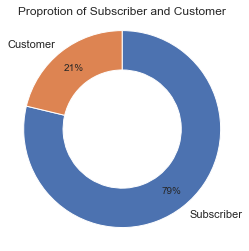

In [12]:
# Pie charts 
sorted_counts = df['user_type'].value_counts()
ax=plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,pctdistance=0.8 ,wedgeprops = {'width' : 0.4}, autopct='%1.0f%%');
plt.title('Proprotion of Subscriber and Customer')
plt.axis('square');

## Univariate Exploration 2

> In bivariate exploration was only 1 variable used for **line plot** 

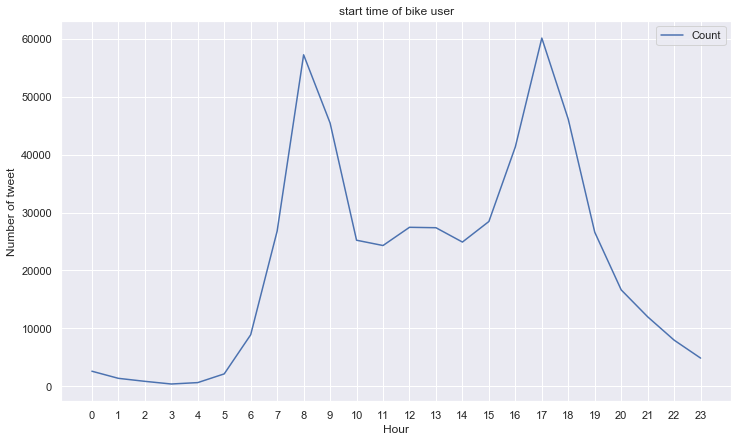

In [13]:
# lineplot 
df2 = df.copy()
#To keep original dataset use .copy()
df2['Hour'] = pd.to_datetime(df2['start_time']).dt.hour
df2['Minute'] = pd.to_datetime(df2['start_time']).dt.minute
df2['Second'] = pd.to_datetime(df2['start_time']).dt.second
df2['Count'] = 1
df2.head(1)

# Use datetime library to get a hour,minute and second data
# Ploting hour data on the graph 


keys = [pair for pair, df in df2.groupby(['Hour'])]
plt.subplots(figsize=(12,7))
plt.plot(keys, df2.groupby(['Hour']).count()['Count'])
plt.xlabel('Hour')
plt.ylabel('Number of tweet')
plt.xticks(keys)
plt.title('start time of bike user')
plt.legend()
plt.show()

# 8am and 5pm are most pouplar time that people rent a bike.
# I guess people ride a bike to go to work and get back home.

## Bivariate Exploration 1

> In bivariate exploration were 2 variables used for **Heatmap** plotting

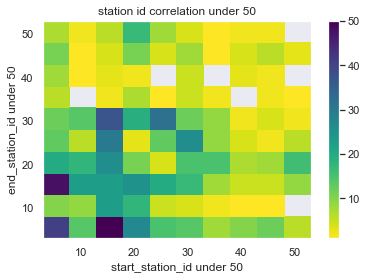

In [6]:
a=df[(df['start_station_id']<50) & (df['end_station_id']<50)]
sample = a.sample(1000)

# a is a dataset with staion_id under 50.The majority of station_id distribution are placed with id number under 50.
# So it's queried both station under 50.
# Neverthless the dataset is still immense.So as a best alternative make sample of 'a' so that we can build a better visualization

bin_x = np.arange(3,49+5,5)
bin_y = np.arange(3,49+5,5)

# the criteria of bins is determined by statistical result of station_id. 
# Use .describe() to check min max.Step is decided in a favor of person,who makes this visualization.

plt.hist2d(data=sample,x='start_station_id',y='end_station_id',cmin=0.5,cmap='viridis_r',
           bins=[bin_x,bin_y]);
plt.colorbar()  # level of color in numeric value  
plt.xlabel('start_station_id under 50')
plt.ylabel('end_station_id under 50')
plt.title('station id correlation under 50');

## Bivariate Exploration 2

> In bivariate exploration were 2 variables used for **scatter** plotting

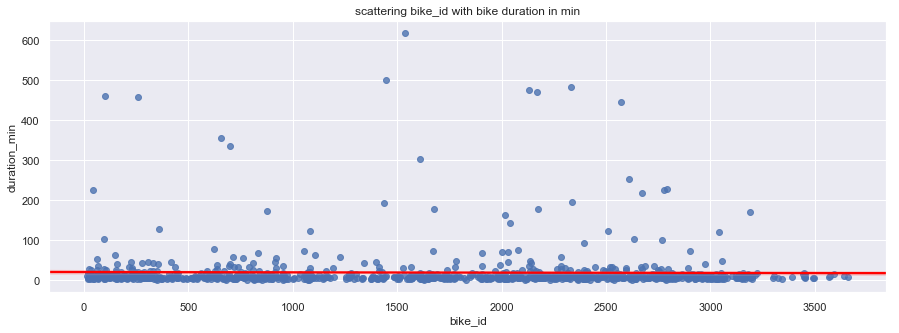

In [7]:
# Regplot : scatterplot + regressionline  
# Main data that was applied is sampling of original data.Because it's required long time to run code and plot.
# Furthermore sampling table represents better depiction on the grid.
plt.subplots(figsize=(15,5))
sns.regplot(data=sample,x='bike_id',y='duration_min',x_jitter=0.04,fit_reg=True,line_kws={'color':'red'});
plt.title('scattering bike_id with bike duration in min');

## Multivariate Exploration 

> In multivariate exploration were more than 2 variables used for **facetGrid** plotting.


In [8]:
df3=df.sample(1000)
df3=df3.reset_index()
# df data is trememdous.It takes a lot of time to wait until the end of for-looping.
# So sampling of original data is best alternative for fast plotting 
# copy df in order to keep original dataset

In [9]:
# start_station_id categorize
list = []
for i in np.arange(0,df3.shape[0],1) : 
    if df3['start_station_id'][i] <=100:
        df3['start_station_id'][i] ='low'
        list.append(df3['start_station_id'][i])
    elif 100< df3['start_station_id'][i] <=200:
        df3['start_station_id'][i] ='middle'
        list.append(df3['start_station_id'][i])
    elif 200<df3['start_station_id'][i] <=300:
        df3['start_station_id'][i] ='high'
        list.append(df3['start_station_id'][i])    
    else :
        df3['start_station_id'][i] ='extrem high'
        list.append(df3['start_station_id'][i])        
        
        
# end_station_id categorize
list2 = []
for i in np.arange(0,df3.shape[0],1) : 
    if df3['end_station_id'][i] <=100:
        df3['end_station_id'][i] ='low'
        list2.append(df3['end_station_id'][i])
    elif 100< df3['end_station_id'][i] <=200:
        df3['end_station_id'][i] ='middle'
        list2.append(df3['end_station_id'][i])
    elif 200<df3['end_station_id'][i] <=300:
        df3['end_station_id'][i] ='high'
        list2.append(df3['end_station_id'][i])    
    else :
        df3['end_station_id'][i] ='extrem high'
        list2.append(df3['end_station_id'][i])    
        
        
# Categorization of numeric data is a good way to show clear visualization.
# Also limited kind of categorical (for instance 4-5 different) data are used for various shape of visualization. 
# 'User_type' is only categorical data.That's why station_id were chosen to become a categorical data
# Interval from 0 to 100 :low
# Interval from 101 to 200 : middle
# Interval from 201 to 300 : high
# Interval over 300 : extreme high

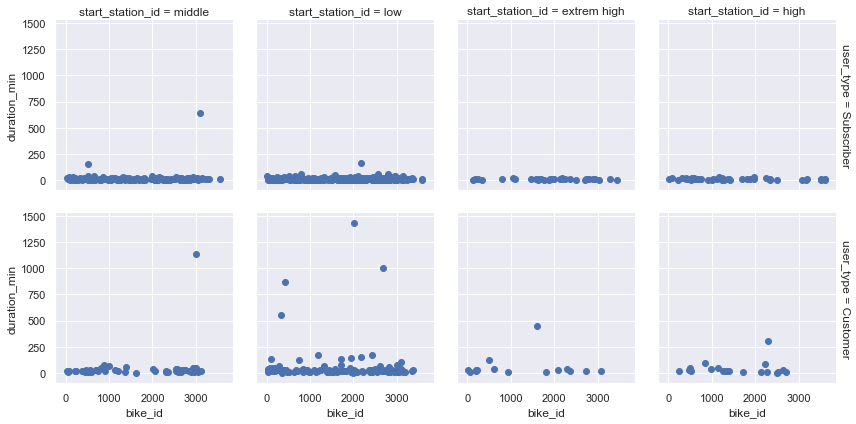

In [10]:
#Faceting : start_station_id,user_type,bike_id,duration_min
g = sns.FacetGrid(data=df3,col='start_station_id',row='user_type',margin_titles=True)
ax=g.map(plt.scatter,'bike_id','duration_min')

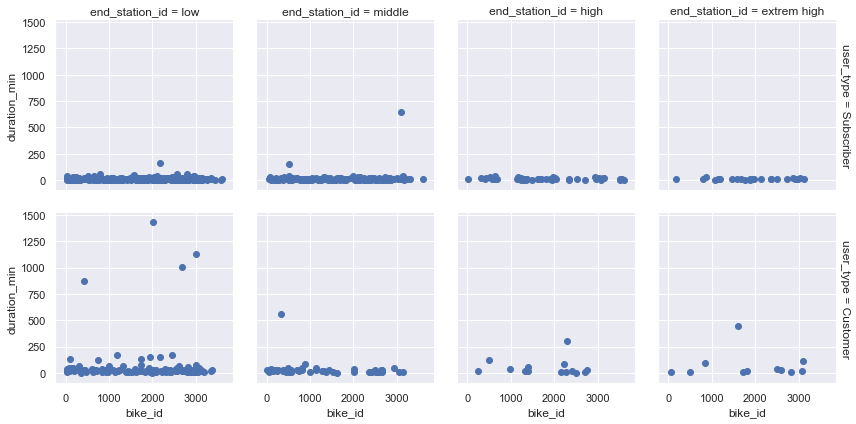

In [11]:
#Faceting : end_station_id,user_type,bike_id,duration_min
base_color = sns.color_palette()[6]
g = sns.FacetGrid(data=df3,col='end_station_id',row='user_type',margin_titles=True)
ax=g.map(plt.scatter,'bike_id','duration_min')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!